In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', 100)

In [82]:
df = pd.read_excel("dataset/Superstore.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Per unit (discount),Per unit (no discount),Sales (no discount),cost per unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,130.98,261.96,110.0232
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,243.98,731.94,170.7860
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,7.31,14.62,3.8743
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,348.21,1741.05,268.1217
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,13.98,27.96,9.9258


In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Per unit (discount),Per unit (no discount),Sales (no discount),cost per unit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,60.919569,75.571127,286.565443,53.120197
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.336000,0.990000,0.990000,0.544500
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,5.470000,6.480000,21.360000,3.473600
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,16.270000,19.980000,64.960000,12.933600
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,63.940000,76.980000,251.910000,54.522000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,3773.080000,7546.160000,45276.960000,4074.926400
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,142.927440,188.961461,864.095772,122.251398


In [5]:
df.isnull().sum()

Row ID                    0
Order ID                  0
Order Date                0
Ship Date                 0
Ship Mode                 0
Customer ID               0
Customer Name             0
Segment                   0
Country                   0
City                      0
State                     0
Postal Code               0
Region                    0
Product ID                0
Category                  0
Sub-Category              0
Product Name              0
Sales                     0
Quantity                  0
Discount                  0
Profit                    0
Per unit (discount)       0
Per unit (no discount)    0
Sales (no discount)       0
cost per unit             0
dtype: int64

In [6]:
caracteristicas_numericas = df.select_dtypes(exclude="object").columns
caracteristicas_categoricas = df.select_dtypes(include="object").columns

In [7]:
print('- Hay tiendas en {} estados'.format(len(df['State'].unique())))
print('- Hay {} productos diferentes'.format(len(df['Product ID'].unique())))
print('- Hay {} categorías diferentes'.format(len(df['Category'].unique())))
print('- Hay {} subcategorías diferentes'.format(len(df['Sub-Category'].unique())))
print('- Hay {} modos de envío diferentes'.format(len(df['Ship Mode'].unique())))

- Hay tiendas en 49 estados
- Hay 1862 productos diferentes
- Hay 3 categorías diferentes
- Hay 17 subcategorías diferentes
- Hay 4 modos de envío diferentes


In [8]:
df.dtypes

Row ID                             int64
Order ID                          object
Order Date                datetime64[ns]
Ship Date                 datetime64[ns]
Ship Mode                         object
Customer ID                       object
Customer Name                     object
Segment                           object
Country                           object
City                              object
State                             object
Postal Code                        int64
Region                            object
Product ID                        object
Category                          object
Sub-Category                      object
Product Name                      object
Sales                            float64
Quantity                           int64
Discount                         float64
Profit                           float64
Per unit (discount)              float64
Per unit (no discount)           float64
Sales (no discount)              float64
cost per unit   

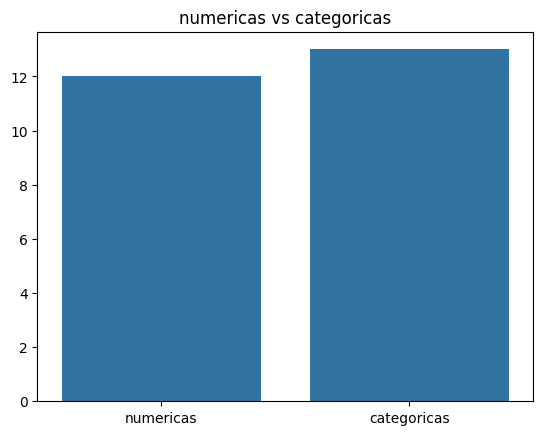

In [10]:
ax = sns.barplot(x=["numericas","categoricas"], y=[caracteristicas_numericas.shape[0], caracteristicas_categoricas.shape[0]])
ax.set_title("numericas vs categoricas")
plt.show()

## Categorias

In [10]:
df.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [12]:
porcentaje_categoria = df.Category.value_counts()
((porcentaje_categoria / porcentaje_categoria.sum())*100).round(2).astype(str) + "%"

Category
Office Supplies     60.3%
Furniture          21.22%
Technology         18.48%
Name: count, dtype: object

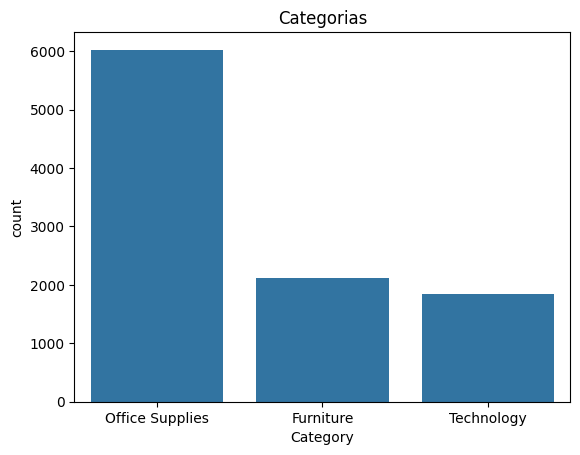

In [13]:
categorias_ordenadas = porcentaje_categoria.index.tolist() 

ax = sns.countplot(data=df, x="Category", order=categorias_ordenadas)
ax.set_title("Categorias")
plt.show()

#### Tipos de clientes

In [14]:
porcentaje_tipos_clientes = df.Segment.value_counts()
((porcentaje_tipos_clientes / porcentaje_tipos_clientes.sum())*100).round(2).astype(str) + "%"

Segment
Consumer       51.94%
Corporate      30.22%
Home Office    17.84%
Name: count, dtype: object

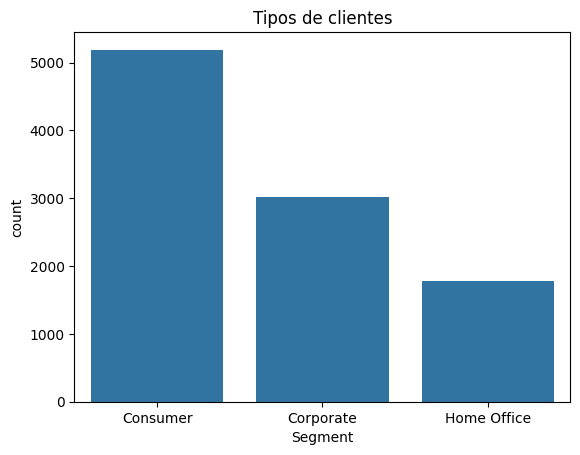

In [22]:
ax = sns.countplot(data=df, x="Segment")
ax.set_title("Tipos de clientes")
plt.show()

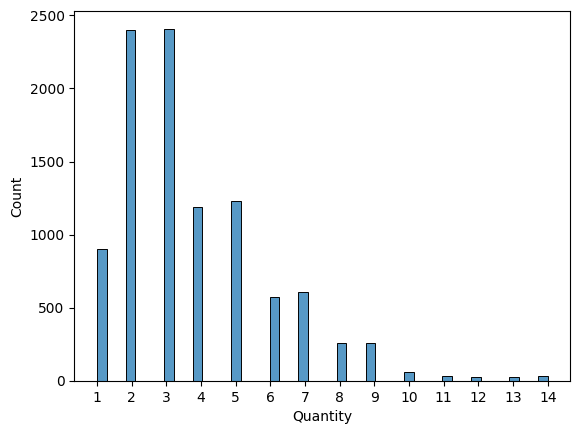

In [23]:
sns.histplot(data=df.Quantity)
plt.xticks(range(df['Quantity'].min(), df['Quantity'].max() + 1))

plt.show()

#### Descuento y ventas

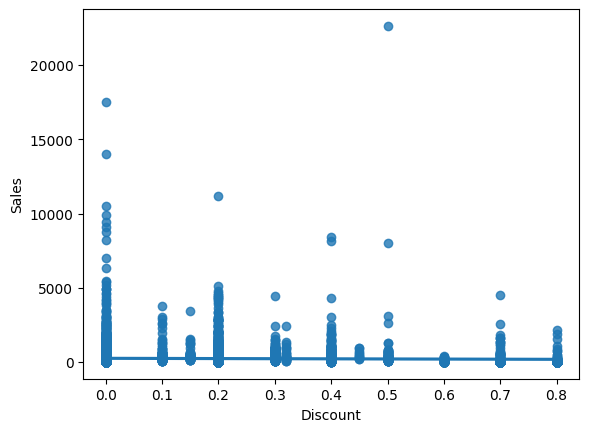

In [37]:
ax = sns.regplot(x="Discount", y="Sales", data=df)

#### Cantidad y ventas

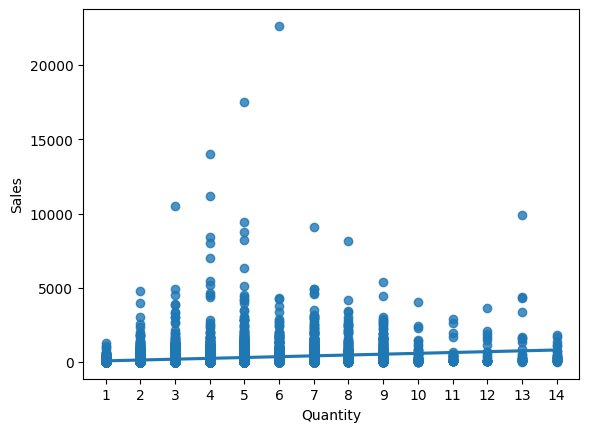

In [109]:
ax = sns.regplot(x="Quantity", y="Sales", data=df)
plt.xticks(range(df['Quantity'].min(), df['Quantity'].max() + 1))

plt.show()

In [17]:
for ky,db in df.groupby("Category"):
    print("\nCategory =", ky)
    x = db["Sub-Category"].value_counts()
    print(x)


Category = Furniture
Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64

Category = Office Supplies
Sub-Category
Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: count, dtype: int64

Category = Technology
Sub-Category
Phones         889
Accessories    775
Machines       115
Copiers         68
Name: count, dtype: int64


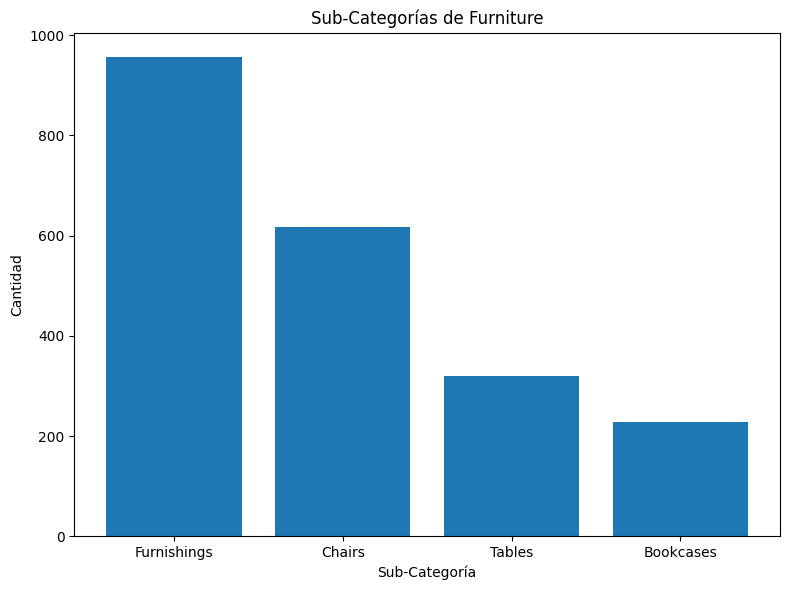

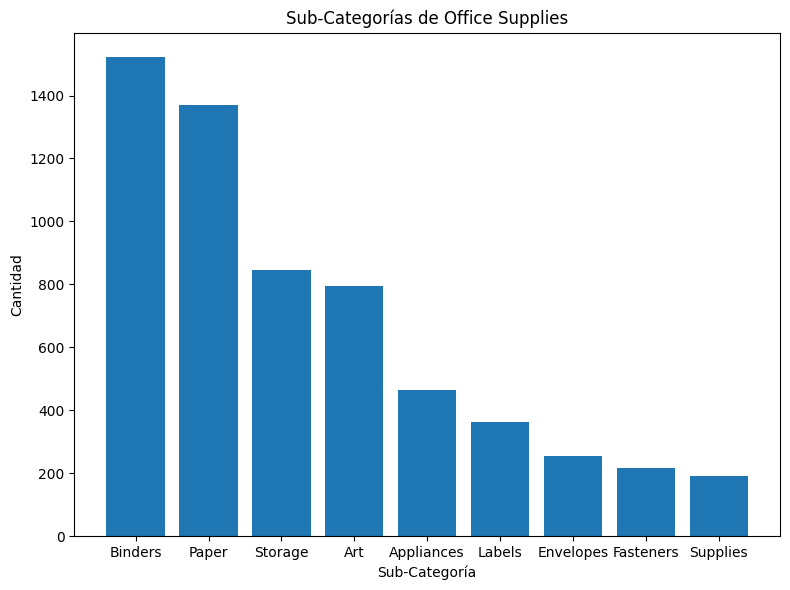

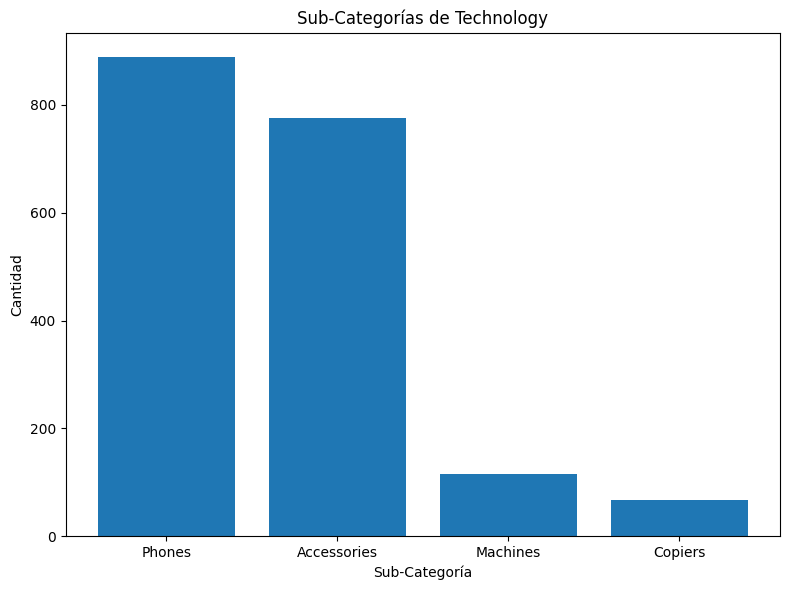

In [26]:
for category, subgroup in df.groupby("Category"):
    plt.figure(figsize=(8, 6))  # Establecer el tamaño del gráfico
    subcategory_counts = subgroup["Sub-Category"].value_counts().reset_index()
    subcategory_counts.columns = ["Sub-Categoría", "Cantidad"]
    plt.bar(subcategory_counts["Sub-Categoría"], subcategory_counts["Cantidad"])
    plt.title(f'Sub-Categorías de {category}')
    plt.xlabel('Sub-Categoría')
    plt.ylabel('Cantidad')
    plt.tight_layout()

    plt.show()

In [27]:
conteo_productos = df["Product Name"].value_counts()

print("Conteo de Productos:")
for nombre_producto, cantidad in conteo_productos.items():
    print(f"Producto: {nombre_producto}, Total: {cantidad}")

Conteo de Productos:
Producto: Staple envelope, Total: 48
Producto: Staples, Total: 46
Producto: Easy-staple paper, Total: 46
Producto: Avery Non-Stick Binders, Total: 20
Producto: Staples in misc. colors, Total: 19
Producto: Staple remover, Total: 18
Producto: KI Adjustable-Height Table, Total: 18
Producto: Storex Dura Pro Binders, Total: 17
Producto: Staple-based wall hangings, Total: 16
Producto: Logitech 910-002974 M325 Wireless Mouse for Web Scrolling, Total: 15
Producto: Situations Contoured Folding Chairs, 4/Set, Total: 15
Producto: Global High-Back Leather Tilter, Burgundy, Total: 14
Producto: Global Wood Trimmed Manager's Task Chair, Khaki, Total: 14
Producto: GBC Premium Transparent Covers with Diagonal Lined Pattern, Total: 14
Producto: Eldon Wave Desk Accessories, Total: 14
Producto: Avery File Folder Labels, Total: 13
Producto: Kingston Digital DataTraveler 16GB USB 2.0, Total: 13
Producto: Zipper Ring Binder Pockets, Total: 13
Producto: Ibico Plastic Spiral Binding Combs,

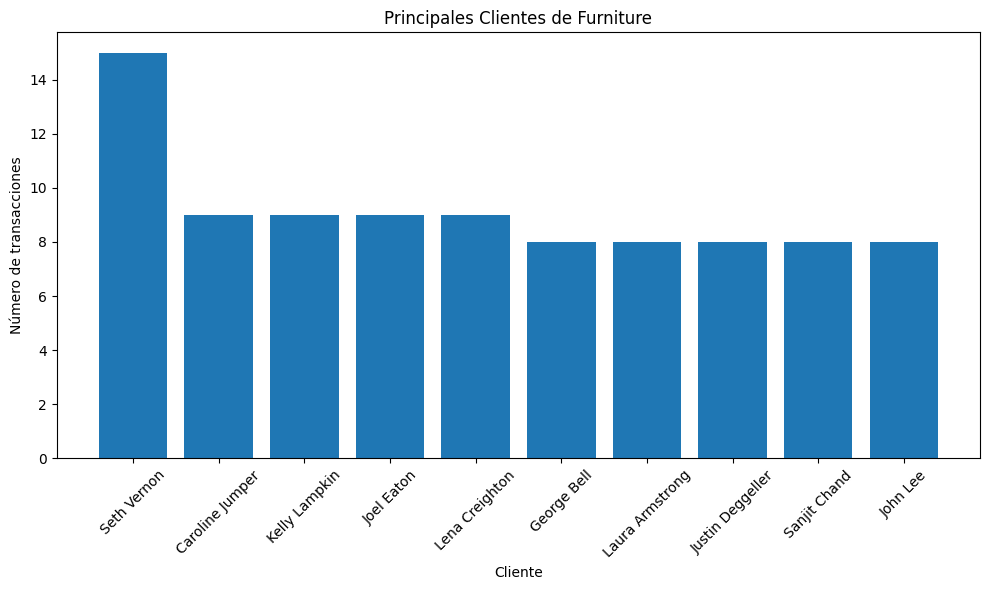

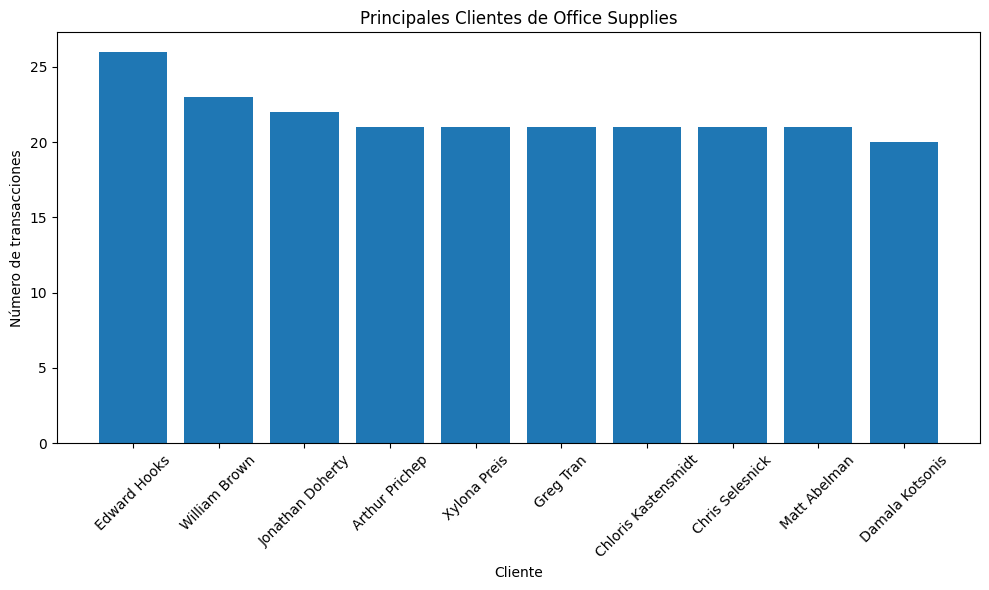

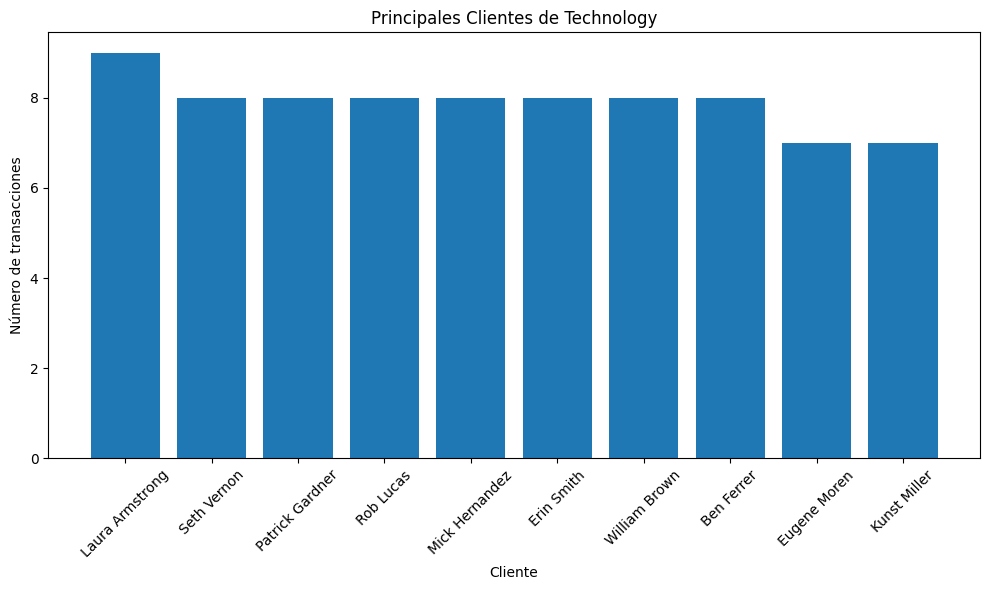

In [30]:
for category, subgroup in df.groupby("Category"):
    plt.figure(figsize=(10, 6))
    
    transacciones_clientes = subgroup['Customer Name'].value_counts()
    
    clientes_ordenados = transacciones_clientes.sort_values(ascending=False)
    
    clientes_ordenados = clientes_ordenados.head(10)
    plt.bar(clientes_ordenados.index, clientes_ordenados.values)
    plt.title(f'Principales Clientes de {category}')
    plt.xlabel('Cliente')
    plt.ylabel('Número de transacciones')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Análisis de la Correlación entre Ventas y Ganancia

In [20]:
x2 = df['Sales']
y2 = df['Profit']

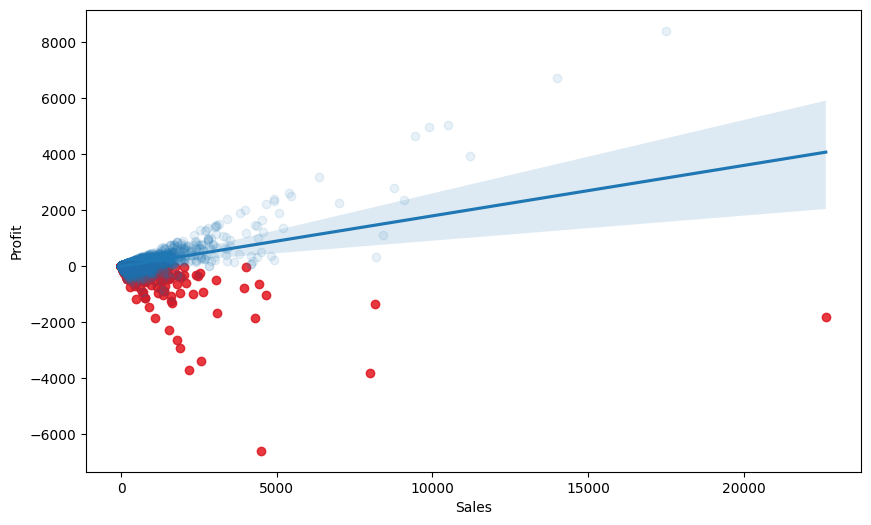

In [21]:
plt.figure(figsize=(10,6))
x2_neg = [x for x, y in zip(x2, y2) if y < 0]
y2_neg = [y for y in y2 if y < 0]

plt.scatter(x2_neg, y2_neg, color='red', alpha=0.8)
sns.regplot(x=x2, y=y2, fit_reg=True, scatter_kws={"alpha": 0.1})
plt.show()

### Análisis del Impacto del Descuento

In [31]:
profit = df.loc[df['Profit'] > 0, ['Profit','Discount']]
profit.head()

,Profit,Discount
0,41.9136,0.0
1,219.5820,0.0
2,6.8714,0.0
4,2.5164,0.2
5,14.1694,0.0


In [32]:
profitloss = df.loc[df['Profit'] <= 0, ['Profit','Discount']]
profitloss.head()

,Profit,Discount
3,-383.0310,0.45
14,-123.8580,0.80
15,-3.8160,0.80
23,-1.0196,0.30
27,-1665.0522,0.50


In [33]:
total_profit = profit['Profit'].sum()
discount_profit = profit['Discount'].mean()*100
print(total_profit)
print(discount_profit)

442528.30739999993
8.104368329610324


In [34]:
total_profitloss = profitloss['Profit'].sum()
discount_profitloss = profitloss['Discount'].mean()*100
print(total_profitloss)
print(discount_profitloss)

-156131.28570000004
46.902892561983464


In [35]:
profits = [total_profit, total_profitloss]
discounts = [discount_profit, discount_profitloss]*100
labels = ['Profit', 'Profit Loss']

In [38]:
discount_profit_str = "{:.2f}%".format(discount_profit)
discount_profitloss_str = "{:.2f}%".format(discount_profitloss)

df2 = pd.DataFrame({
    'Type': ['Profit', 'Profit Loss'],
    'Value': [total_profit, total_profitloss],
    'Discount': [discount_profit_str, discount_profitloss_str]
})

fig = px.bar(df2, x='Value', y='Type', color='Type',
             labels={'Value': 'Cantidad', 'Type': 'Tipo'},
             title='Profit y Discount',
             text='Discount',
             orientation='h')
fig.show()

In [108]:
fig = px.box(df, x='Category', y='Quantity', title='Distribucion de ventas por categoría')
fig.show()

In [39]:
eliminar = ['Order Date','Ship Date']
df2 = df.drop(columns=eliminar)

In [40]:
top_clientes = df2.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(10)
top_clientes = top_clientes[["Sales"]].round(2)
top_clientes.reset_index(inplace=True)

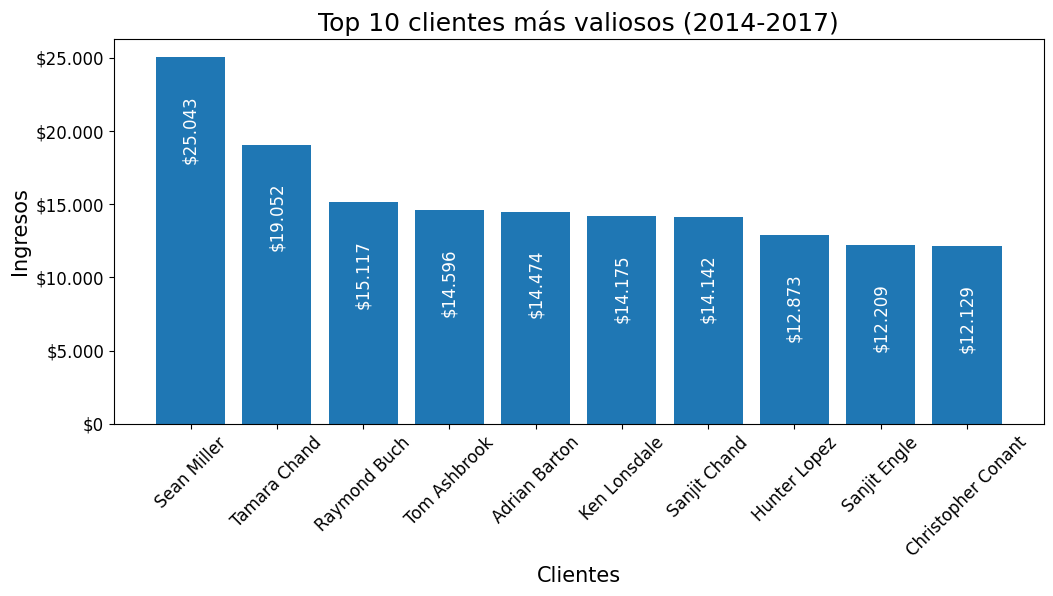

In [60]:
plt.figure(figsize=(12, 5)) 
plt.title("Top 10 clientes más valiosos (2014-2017)", fontsize=18)
bars = plt.bar(top_clientes["Customer Name"], top_clientes["Sales"], linewidth=1)

plt.xlabel("Clientes", fontsize=15)
plt.ylabel("Ingresos", fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

for k, v in enumerate(top_clientes["Sales"]): 
    plt.text(k, v - 7000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=12, rotation=90, color='white', ha='center')
    
def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

In [45]:
Top_peores = df2.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).tail(10)
Top_peores = Top_peores[["Sales"]].round()
Top_peores.reset_index(inplace=True)

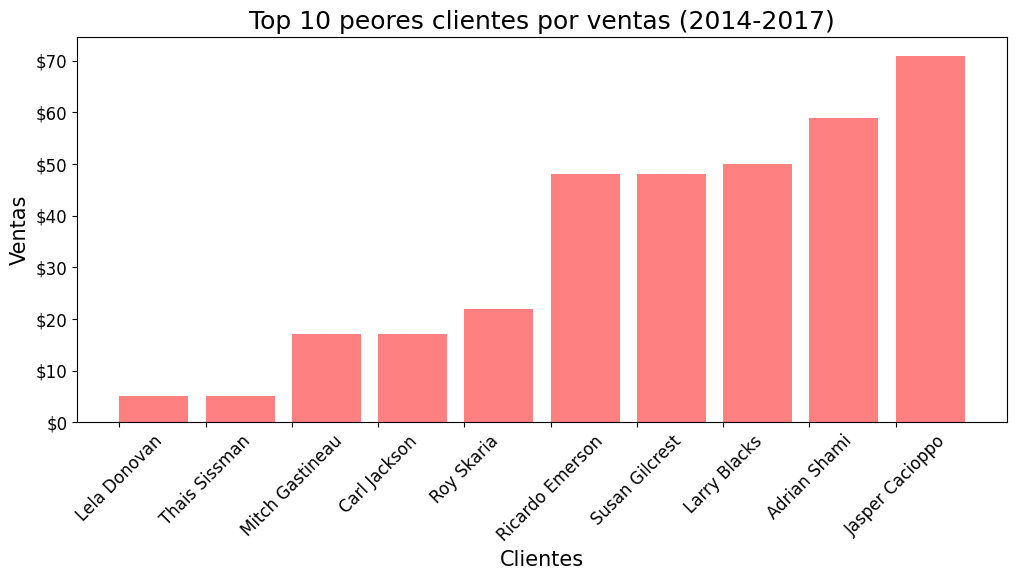

In [59]:
plt.figure(figsize=(12, 5)) 
plt.title("Top 10 peores clientes por ventas (2014-2017)", fontsize=18)

Top_peores_ordenados = Top_peores.sort_values("Sales")

bars = plt.bar(Top_peores_ordenados["Customer Name"], Top_peores_ordenados["Sales"], color=(1.0, 0.5, 0.5), linewidth=1, align='edge')

plt.xlabel("Clientes", fontsize=15)
plt.ylabel("Ventas", fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

for bar, v in zip(bars, Top_peores_ordenados["Sales"][:len(bars)]):
    plt.text(bar.get_x() + bar.get_width() / 2, v, '${:,.0f}'.format(v).replace(',', '.'), ha='center', va='bottom', fontsize=13, color='white')
    
def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

In [50]:
top_estados = df2.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(10)
top_estados = top_estados[["Sales"]].round(2)
top_estados.reset_index(inplace=True)

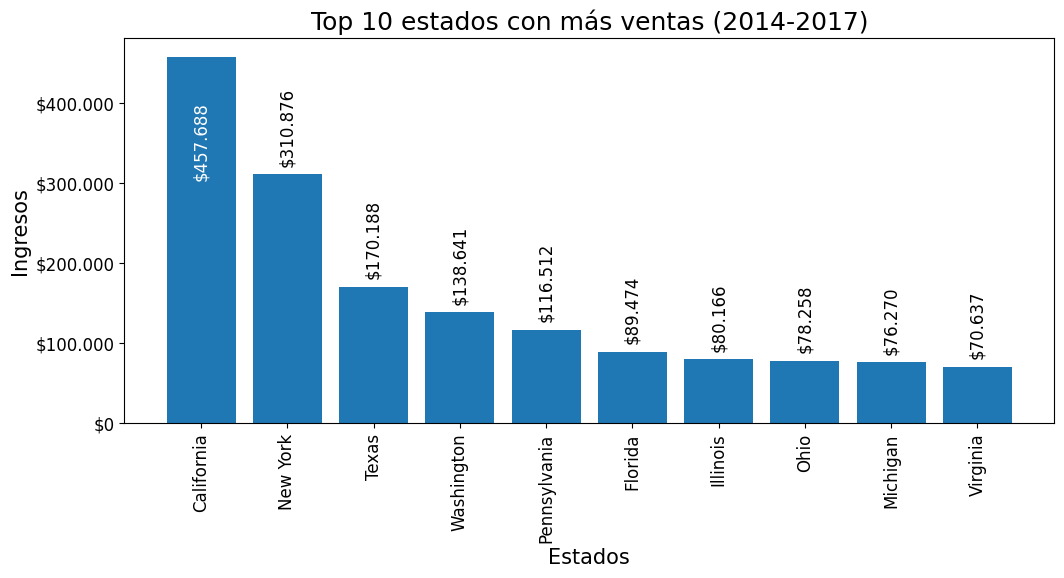

In [58]:
plt.figure(figsize=(12, 5)) 
plt.title("Top 10 estados con más ventas (2014-2017)", fontsize=18) 
bars = plt.bar(top_estados["State"], top_estados["Sales"], linewidth=1)
plt.xlabel("Estados", fontsize=15)
plt.ylabel("Ingresos", fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for k, v in enumerate(top_estados["Sales"]): 
    if v > 400000:
        plt.text(k, v - 150000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=12, rotation=90, color='white', ha='center')
    else:
        plt.text(k, v + 15000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=12, rotation=90, color='black', ha='center')

def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()


In [53]:
top_region = df2.groupby(["Region"]).sum().sort_values("Sales", ascending=False)
top_region = top_region[["Sales"]].astype(int)
top_region.reset_index(inplace=True)

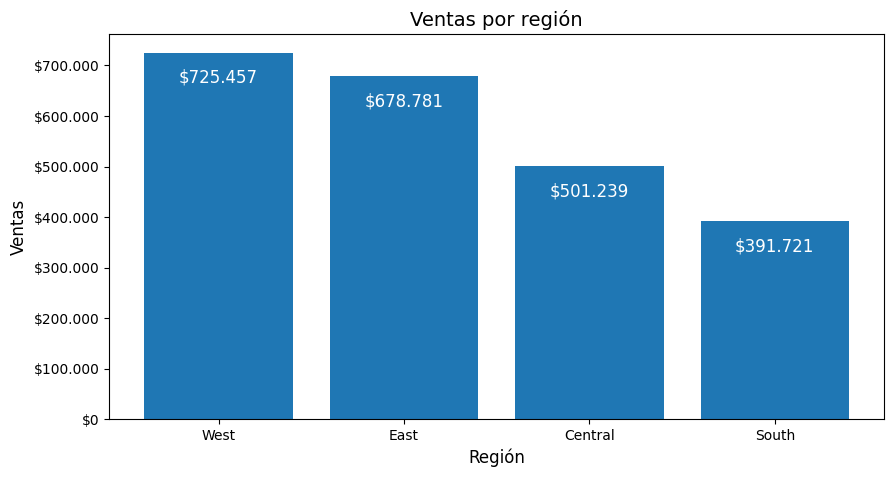

In [57]:
plt.figure(figsize=(10, 5))
plt.title("Ventas por región", fontsize=14)
bars = plt.bar(top_region["Region"], top_region["Sales"], linewidth=1)

for k, v in top_region["Sales"].items():
    plt.text(k, v - 60000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=12, color='white', horizontalalignment='center')

plt.xlabel("Región", fontsize=12)
plt.ylabel("Ventas", fontsize=12)

def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

In [61]:
categoria_ventas = df2.groupby(["Category"]).sum().sort_values("Sales", ascending=False)
categoria_ventas = categoria_ventas[["Sales"]].astype(int)
categoria_ventas.reset_index(inplace=True)

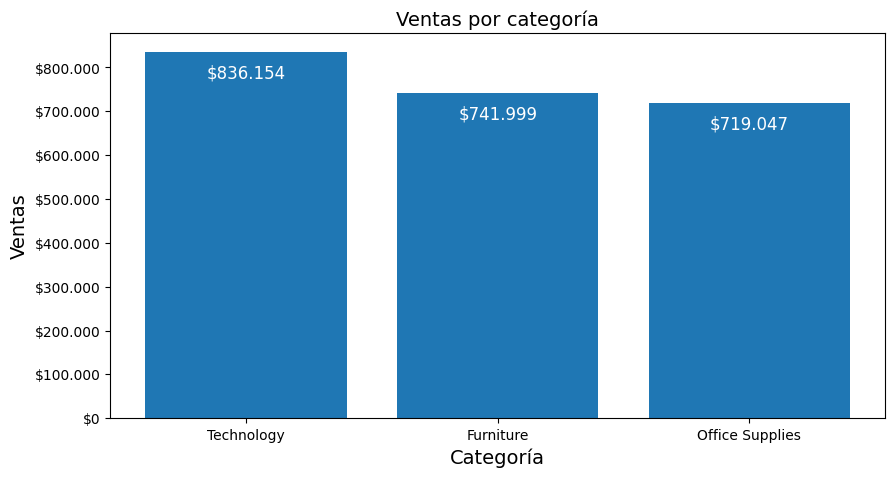

In [63]:
plt.figure(figsize=(10, 5))
plt.title("Ventas por categoría", fontsize=14)
bars = plt.bar(categoria_ventas["Category"], categoria_ventas["Sales"], linewidth=1)

for k, v in categoria_ventas["Sales"].items():
    plt.text(k, v - 60000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=12, color='white', horizontalalignment='center')

plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

In [64]:
sub_categoria_ventas = df2.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False)
sub_categoria_ventas = sub_categoria_ventas[["Sales"]].astype(int)
sub_categoria_ventas.reset_index(inplace=True)

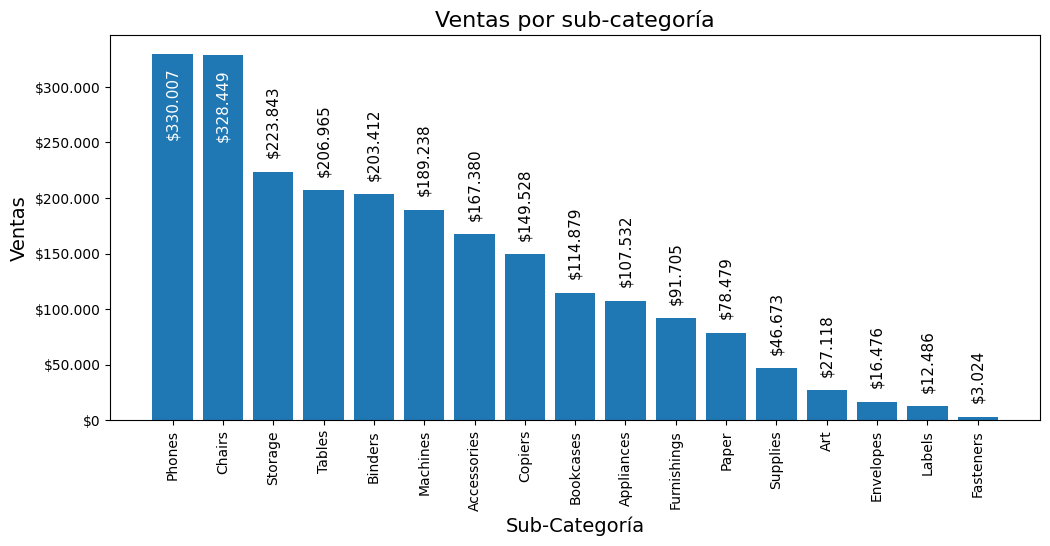

In [66]:
plt.figure(figsize=(12, 5))
plt.title("Ventas por sub-categoría", fontsize=16)
bars = plt.bar(sub_categoria_ventas["Sub-Category"], sub_categoria_ventas["Sales"], linewidth=1)

for k, v in sub_categoria_ventas["Sales"].items():
    if v > 250000:
        plt.text(k, v - 75000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=11, rotation=90, color='white', ha='center')
    else:
        plt.text(k, v + 15000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=11, rotation=90, color='black', ha='center')

plt.xlabel("Sub-Categoría", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

plt.xticks(rotation=90)

def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

In [67]:
nombre_producto_ventas = df2.groupby(["Product Name"]).sum().sort_values("Sales", ascending=False).head(10)
nombre_producto_ventas = nombre_producto_ventas[["Sales"]].astype(int)
nombre_producto_ventas.reset_index(inplace=True)

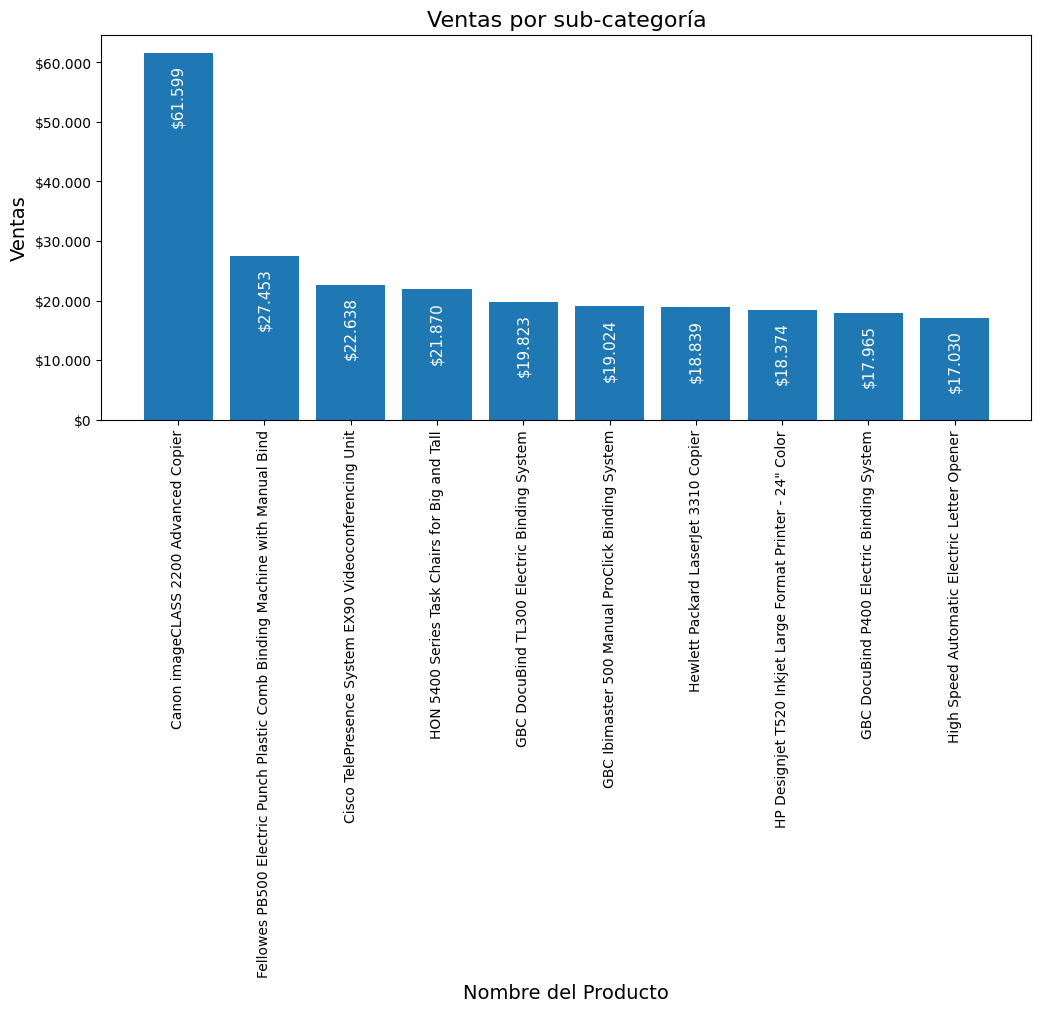

In [68]:
plt.figure(figsize=(12, 5))
plt.title("Ventas por sub-categoría", fontsize=16)
bars = plt.bar(nombre_producto_ventas["Product Name"], nombre_producto_ventas["Sales"], linewidth=1)

for k, v in nombre_producto_ventas["Sales"].items():
    if v > 12000:
        plt.text(k, v - 12000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=11, rotation=90, color='white', ha='center')
    else:
        plt.text(k, v + 12000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=11, rotation=90, color='black', ha='center')

plt.xlabel("Nombre del Producto", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

plt.xticks(rotation=90)

def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

In [69]:
segment_ventas = df2.groupby(["Segment"]).sum().sort_values("Sales", ascending=False)
segment_ventas = segment_ventas[["Sales"]].astype(int)
segment_ventas.reset_index(inplace=True)

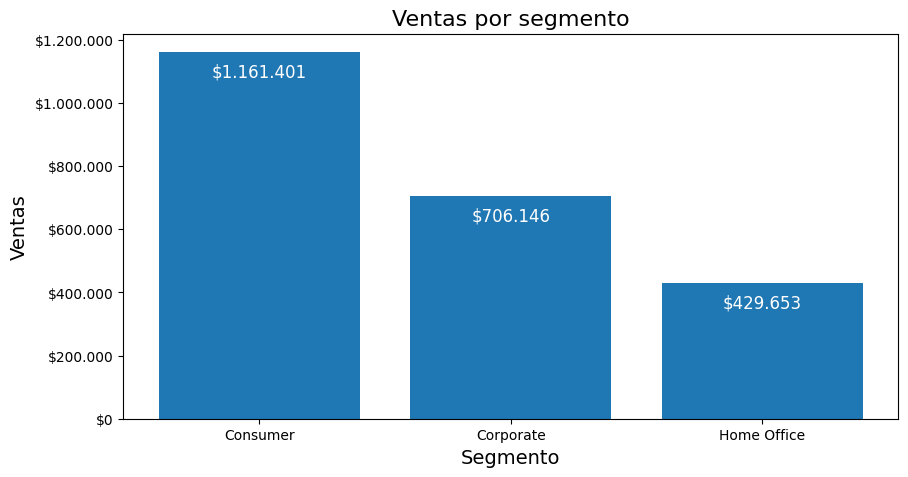

In [70]:
plt.figure(figsize=(10, 5))
plt.title("Ventas por segmento", fontsize=16)
bars = plt.bar(segment_ventas["Segment"], segment_ventas["Sales"], linewidth=1)

for bar, v in zip(bars, segment_ventas["Sales"]):
    plt.text(bar.get_x() + bar.get_width() / 2, v - 80000, '${:,.0f}'.format(v).replace(',', '.'), fontsize=12, color='white', horizontalalignment='center')

plt.xlabel("Segmento", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

def format_y_tick(x, pos):
    return '${:,.0f}'.format(x).replace(',', '.')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

In [71]:
fecha_minima = df['Order Date'].min()
fecha_maxima = df['Order Date'].max()
print(fecha_minima, fecha_maxima)

2014-01-03 00:00:00 2017-12-30 00:00:00


In [73]:
import plotly.graph_objects as go

fig = go.Figure()

for year in range(2014, 2018):
    rango_fechas = df.loc[df['Order Date'].dt.year == year]
    ventas_año = rango_fechas.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
    fig.add_trace(go.Scatter(x=ventas_año['Order Date'], y=ventas_año['Sales'], mode='lines', name=f'Ventas {year}'))

fig.update_layout(title='Ventas 2014-2017')

fig.show()

In [212]:
ventas_año['Sales'].describe().round()

count      322.0
mean      2277.0
std       2409.0
min          4.0
25%        579.0
50%       1475.0
75%       3064.0
max      15159.0
Name: Sales, dtype: float64

In [76]:
for year in range(2014, 2018):
    rango_fechas2 = df.loc[(df['Order Date'].dt.year == year)]
    ventas_por_año = rango_fechas2.groupby('Order Date').agg({'Sales': 'sum'})
    fig2 = px.line(ventas_por_año, title=f'Ventas {year}')
    fig2.show()

In [106]:
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')

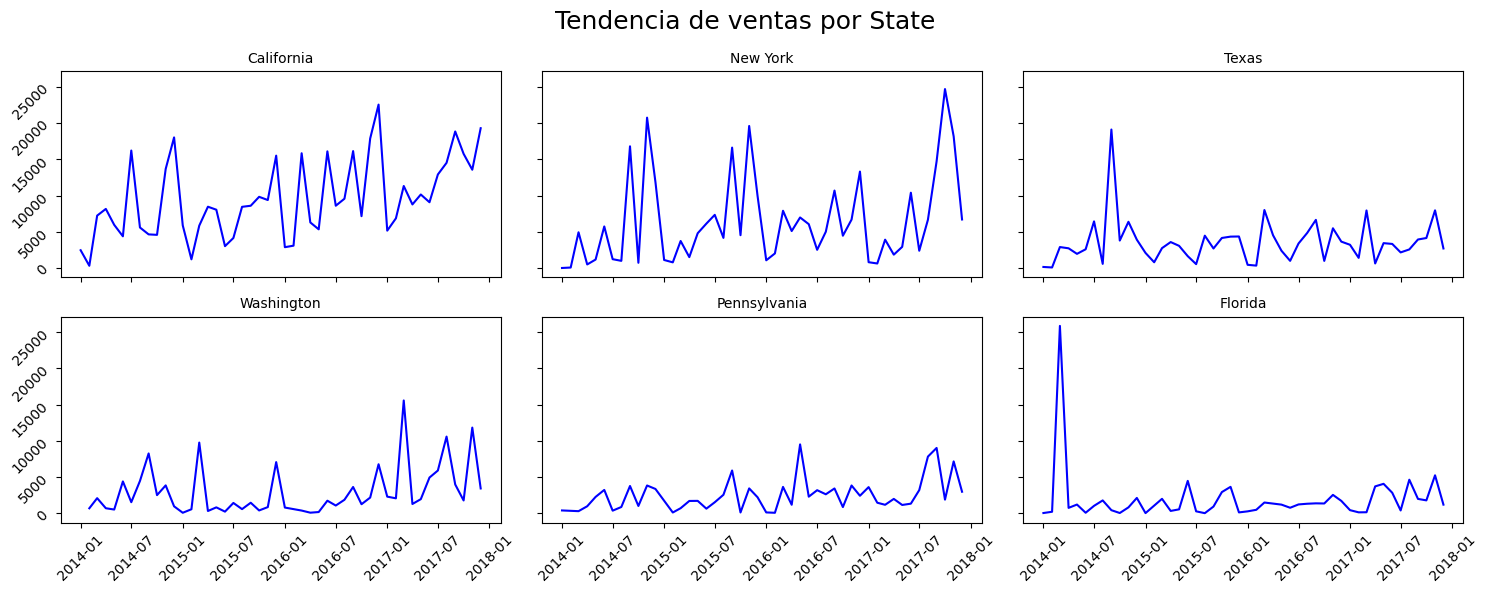

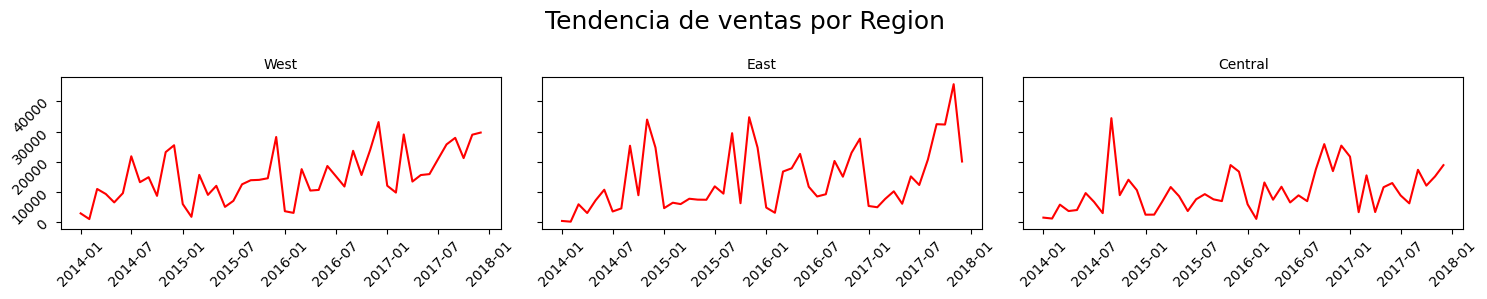

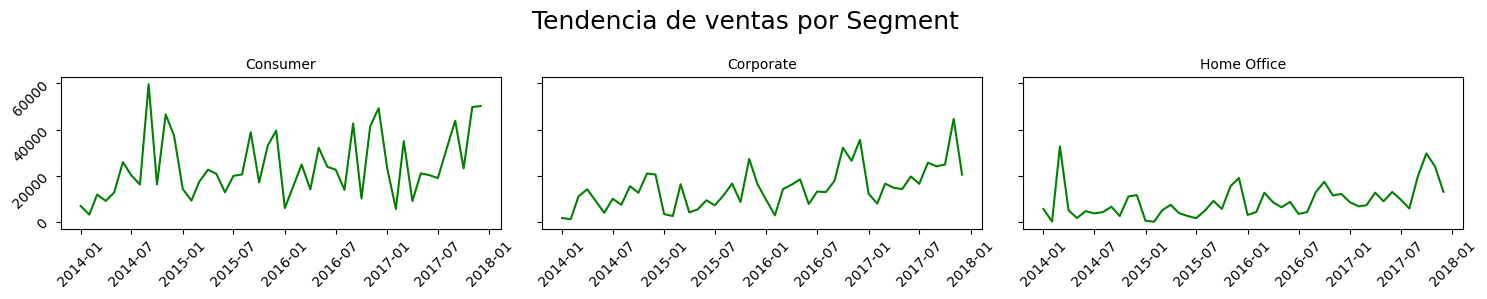

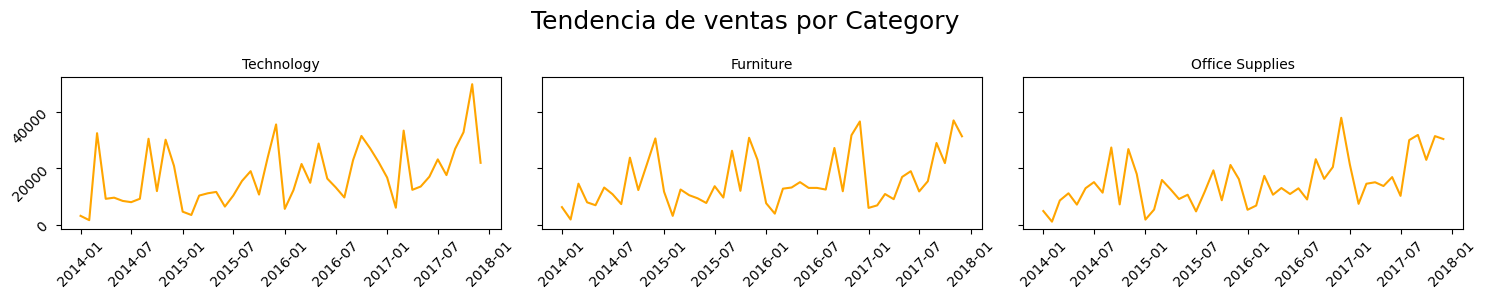

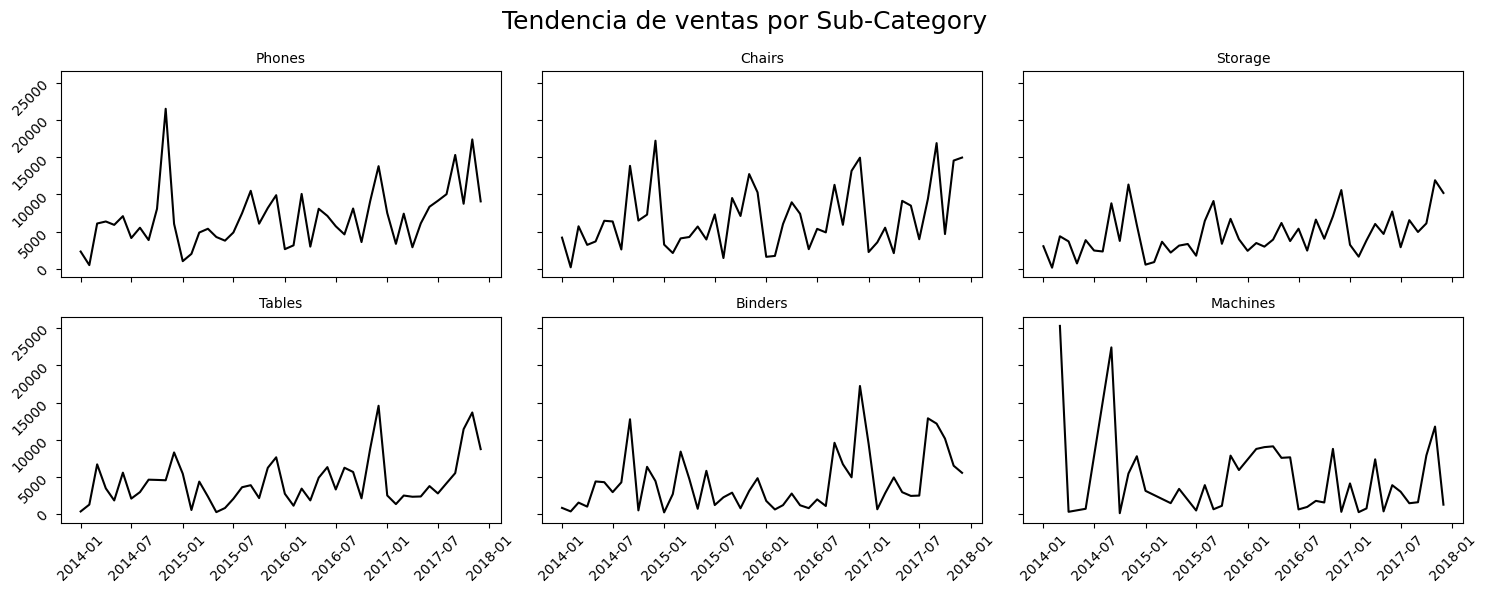

In [78]:
def plot_trend_group(group,size, color='blue'):
    sales_by_group = df.groupby(group)['Sales'].sum()
    sales_by_group.sort_values(ascending= False, inplace=True)
    sales_by_group.head(size)
    
    fig, axes = plt.subplots(int(size/3),3, figsize=(15,size), sharex =True, sharey =True)
    fig.suptitle('Tendencia de ventas por {}'.format(group), fontsize=18)
    
    for ax,group_name in zip(axes.flat, sales_by_group.index):
        sales_group = df[df[group]==group_name]
        sales_group = sales_group.groupby('month')['Sales'].sum()
        sales_group.index = sales_group.index.to_timestamp()
        ax.tick_params(labelrotation=45)
        ax.set_title(group_name, fontsize = 10)
        ax.plot(sales_group, color=color)
    fig.tight_layout()
plot_trend_group('State',6)
plot_trend_group('Region',3, 'red')
plot_trend_group('Segment',3,'green')
plot_trend_group('Category',3, 'orange')
plot_trend_group('Sub-Category',6, 'black')